# **PRÁCTICA 6:  Machine Learning - Parte 2: Decision Tree Regressor**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

La parte de regresión podemos ver que va a ser muy parecida a la parte anterior diferenciandose de nuestro predictor base. Donde:

- En vez de trabajar con el DecisionTreeClassifier trabajaremos con el DecisionTreeRegressor.

- En vez de usar la moda (no vamos a predecir clases vamos a predecir valores numéricos) pues tomaremos la media de las predicciones. 

Por lo demás en bagging es lo mismo. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import mode as moda

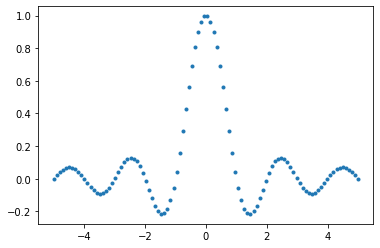

In [ ]:
# Preparamos unos datos de juguete siguiendo la función sinc
X = np.linspace(-5, 5, 100)[:, None]
y = np.sinc(X)
plt.plot(X, y, '.');

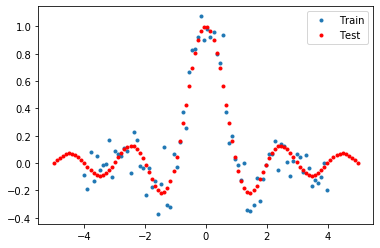

In [ ]:
# Metemos ruido en los datos de entrenamiento
pcut = 4
noise = 0.1
Xtr = X[(-pcut <= X) & (X <= pcut)][:, None]
ytr = y[(-pcut <= X) & (X <= pcut)][:, None]
ytr = ytr + noise * np.random.randn(ytr.shape[0], 1)
Xts = X; yts = y
plt.plot(Xtr, ytr, '.')
plt.plot(Xts, yts, 'r.')
plt.legend(['Train','Test']);

# Como ya vimos el de test si que alarga un poco más en la zona desconocida.
# Esto un árbol no es capaz de predecirlo correctamente y con un bosque tampoco lo va a ser


### Ejercicio 1: Entrena y predice mediante un árbol de regresión usando  como criterio 'mse' 

In [ ]:
from sklearn.metrics import mean_squared_error 
# Creamos el árbol 
dt = DecisionTreeRegressor(criterion = "mse")
dt.fit(Xtr, ytr)
yp = dt.predict(Xts)

print("R^2:  ", dt.score(Xts,yts))
print("MSE:  ", mean_squared_error(yts, yp))
print("RMSE: ", np.sqrt(mean_squared_error(yts, yp)))


R^2:   0.7946551787883442
MSE:   0.01774172567615023
RMSE:  0.13319806934092637


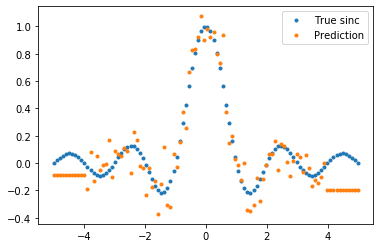

In [ ]:
# Muestra los resultados graficamente
plt.plot(Xts, yts, '.')
plt.plot(Xts, yp, '.')
plt.legend(['True sinc', 'Prediction']);

# BAGGING
### Ejercicio 2: Crea un bosque usando muchos árboles. ¿Qué funciona mejor el árbol o el bosque?

Vamos a ver si podemos mejorar esto un poquito que hicimos con un único árbol utilizando un bosque y el método bagging.

In [ ]:
# Nos creamos el bosque, lo que lamaremos  yp_bagging

def yp_bagging(tree_list, nt, Xtr, ytr, Xts):
    
    # Cuantos elementos voy a predecir X.shape[0] y cuantas veces voy a predecir nt
    yp = np.zeros((X.shape[0],nt)) 
    
    # Entrenamiento 
    for a in range(nt):
        predictor = DecisionTreeRegressor()
        #generamos el nuevo conjunto de datos usando resample, replace = True, Xtr, ytr.
        Xtr_new, ytr_new = resample(Xtr, ytr, replace = True)
        new_tree = predictor.fit(Xtr_new, ytr_new)
        
        #Añadimos a la lista creada anteriormente el árbol entrenado.
        tree_list.append(new_tree)
    
    # Predicción 
    for i in range(nt):
        # predecimos con cada árbol y guardamos resultados 
        yp[:,i] = tree_list[i].predict(Xts)
    
    # Obtenemos la media de las predicciones con np.mean
    yp = np.mean(yp, axis = 1) #axix = 1 para que tenga en cuenta las filas en la votación
    
    return yp

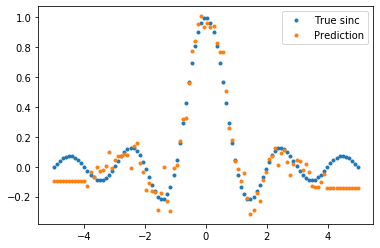

In [ ]:
# Creamos una lista para guardar cada uno de los árboles.
tree_list = []
nt = 100

yp_b = yp_bagging(tree_list, nt, Xtr, ytr ,Xts )

# Muestra los resultados graficamente
plt.plot(Xts, yts, '.')
plt.plot(Xts, yp_b, '.')
plt.legend(['True sinc', 'Prediction']);

# Como podemos ver aquí ahora mejora un poquito pero no es una mejora espectacular, no es tan ruidoso. 
# En cuanto a la zona conocida podemos ver una mejora apreciable mientras que en las colas volvemos a tener el mismo 
# problema.

# Tiene sentido porque todos los árboles que entrenemos van a obtener las mismas predicciones, asiq si entrenamos un 
# mogollon de árboles como todos están prediciendo lo mismo al hacer la media de lo mismo, no nos va a solucionar el 
# problema.

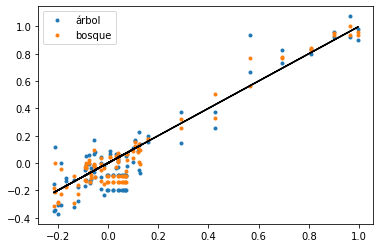

In [ ]:
# Compara los dos métodos gráficamente
plt.plot(yts, yp,'.')
plt.plot(yts, yp_b, '.')
plt.plot(yts, yts, '-k')
plt.legend(['árbol', 'bosque']);

# Lo más importante aquí es entendeer que el mejor predictor es aquel cuyos puntos están más cerca de la recta.
# En este caso si que se puede apreciar que los puntos naranjas quedan más cercanos a la recta mientras que los 
# puntitos azules que son los de un único árbol están más dispersos al rededor de esa recta.

### Ejercicio 3: Usa el método de bagging en el dataset "diabetes" y muestra como varía el error con el número de árboles.

Ayuda:
X, y = load_diabetes(return_X_y=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

X, y = load_diabetes(return_X_y = True)
Xtrain, Xtest, ytrain , ytest = train_test_split(X, y, test_size=0.3)

nt = 100

R2   = []
MSE  = []
RMSE = []

for nt in range(10, 100, 10):
    
    # Creamos una lista para guardar cada uno de los árboles.
    tree_list = []
    
    # Entrenamiento 
    for a in range(nt):
        
        #generamos el nuevo conjunto de datos para entrenar
        Xtr_new, ytr_new = resample(Xtrain, ytrain, replace = True)
        
        # Entrenamos con el nuevo conjunto de datos.
        br = BaggingRegressor(n_estimators = 100)
        new_tree = br.fit(Xtr_new, ytr_new)
        
        #Añadimos a la lista creada anteriormente el árbol entrenado.
        tree_list.append(new_tree)
    
    # Predicción 
    yp = br.predict(Xtest)
        
    # Error
    MSE.append(mean_squared_error(ytest, yp))

    

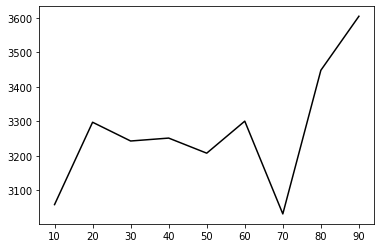

In [ ]:
plt.plot(range(10, 100, 10), MSE,'-k')